Імпортуємо усі необхідні пакети.

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame

Зчитуємо датасет, правильно вказавши його кодування.

In [37]:
def read_dataset(path: str):
    data = pd.read_csv(path, sep=";", encoding='cp1252')
    return data
df = read_dataset("Data2.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    object 
 3   Populatiion     216 non-null    float64
 4   CO2 emission    205 non-null    object 
 5   Area            217 non-null    object 
dtypes: float64(1), object(5)
memory usage: 10.3+ KB


При дослідженні даних датасету можна помітити, що певна колонка містять помилку в назві. Також, що деякі колонки з числовими даними містять тип даних object. Щоб коректно привести їх у тип float, необхідно усюди замінити коми на крапки. Також є пропущені дані. Ще є дані, значення яких менше нуля.

In [38]:
df = df.rename(columns={'Populatiion': 'Population'})
print(df.columns)

Index(['Country Name', 'Region', 'GDP per capita', 'Population',
       'CO2 emission', 'Area'],
      dtype='object')


Одразу приведемо дані до типу float задля подальших операцій.

In [40]:
def correct_floats_in_columns(df: DataFrame, list_of_columns: list[str]):
    for column in list_of_columns:
        df[column] = df[column].astype(str).str.replace(',', '.').astype(float)
    return df
correct_floats_in_columns(df, ['GDP per capita', 'CO2 emission', 'Area'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 217 entries, 0 to 216
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    217 non-null    object 
 1   Region          217 non-null    object 
 2   GDP per capita  190 non-null    float64
 3   Population      216 non-null    float64
 4   CO2 emission    205 non-null    float64
 5   Area            217 non-null    float64
dtypes: float64(4), object(2)
memory usage: 10.3+ KB


Тепер знайдемо рядки з пропущеною інформацією.

In [41]:
def get_missing_values(df:DataFrame):
    return df[df.isna().any(axis = 1)]
print(get_missing_values(df))

                  Country Name                      Region  GDP per capita  \
3               American Samoa         East Asia & Pacific    11834.745230   
9                        Aruba   Latin America & Caribbean             NaN   
21                     Bermuda               North America             NaN   
27      British Virgin Islands   Latin America & Caribbean             NaN   
36              Cayman Islands   Latin America & Caribbean             NaN   
39             Channel Islands       Europe & Central Asia             NaN   
49                        Cuba   Latin America & Caribbean             NaN   
50                     Curacao   Latin America & Caribbean             NaN   
54                    Djibouti  Middle East & North Africa             NaN   
61                     Eritrea          Sub-Saharan Africa             NaN   
64               Faroe Islands       Europe & Central Asia             NaN   
68            French Polynesia         East Asia & Pacific      

Знайдемо рядки з від'ємними значеннями.

In [42]:
def get_negative_rows(df: DataFrame):
    return df.loc[(df['GDP per capita'] < 0) | (df['CO2 emission'] < 0) | (df['Area'] < 0)]
print(get_negative_rows(df))

           Country Name                     Region  GDP per capita  \
56   Dominican Republic  Latin America & Caribbean    -6722.223536   
135             Myanmar        East Asia & Pacific     1195.515372   

     Population  CO2 emission      Area  
56   10648791.0     21539.958   48670.0  
135  52885223.0     21631.633 -676590.0  


Виправляємо усі некоректні дані. Для цього:
 - Ми уже привели дані до типу float.
 - Для кожної колонки беремо модуль усіх чисел.
 - Заповнюємо пропущені дані середніми значеннями.

In [43]:
def correct_data(df: DataFrame, list_of_columns: list[str]):
    for column in list_of_columns:
        df[column] = df[column].abs()
    df = df.fillna(df.mean(numeric_only=True))
    return df
df = correct_data(df, ['GDP per capita', 'CO2 emission', 'Area'])
print(get_negative_rows(df))
print(get_missing_values(df))

Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Population, CO2 emission, Area]
Index: []
Empty DataFrame
Columns: [Country Name, Region, GDP per capita, Population, CO2 emission, Area]
Index: []


Побудуємо діаграми розмаху для кожного стовпця з числовими значеннями.

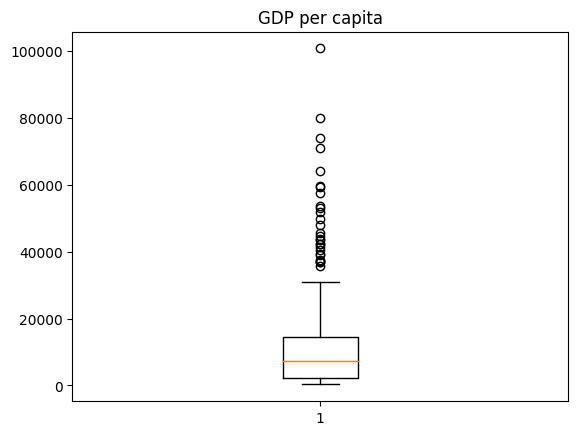

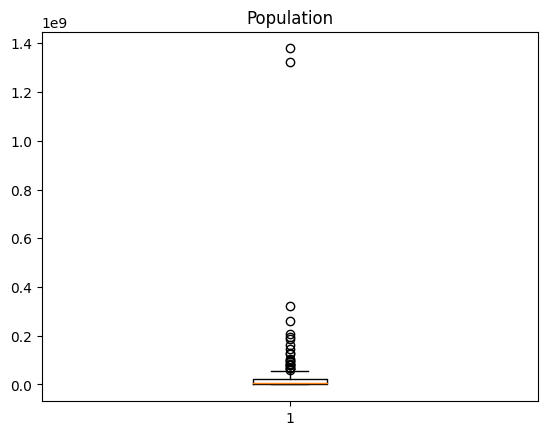

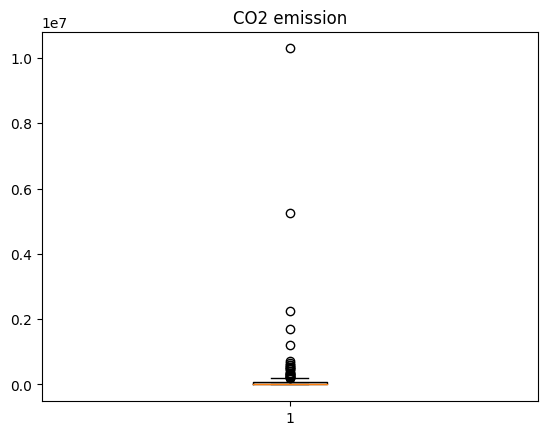

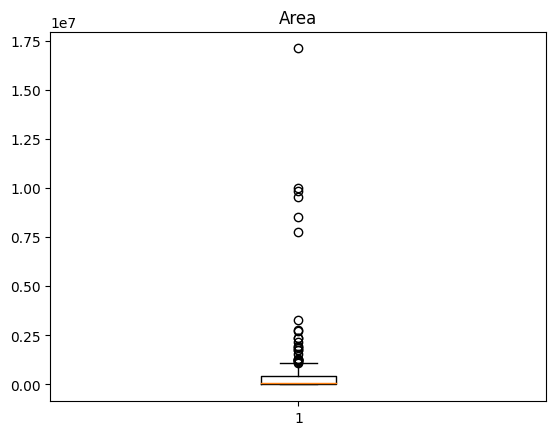

In [44]:
for column in df.columns:
    if df[column].dtype == float:
        plt.figure()
        plt.boxplot(df[column])
        plt.title(column)
        plt.show()

Побудуємо гістограми для кожної числової колонки

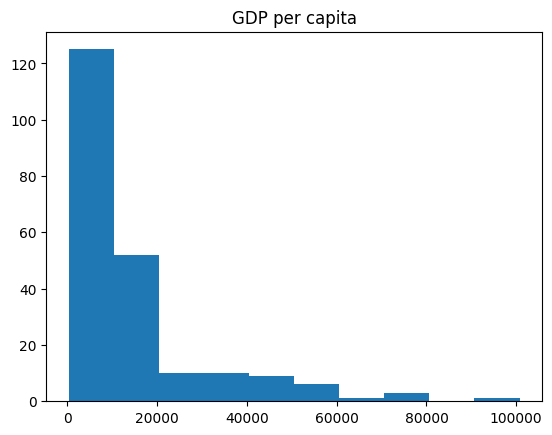

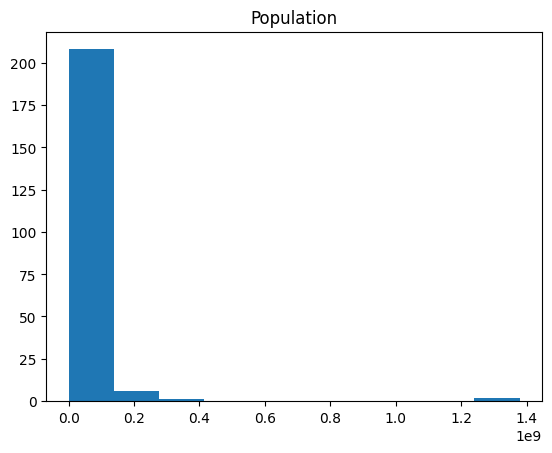

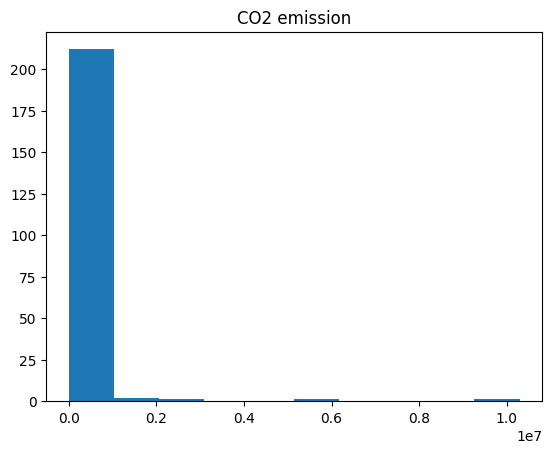

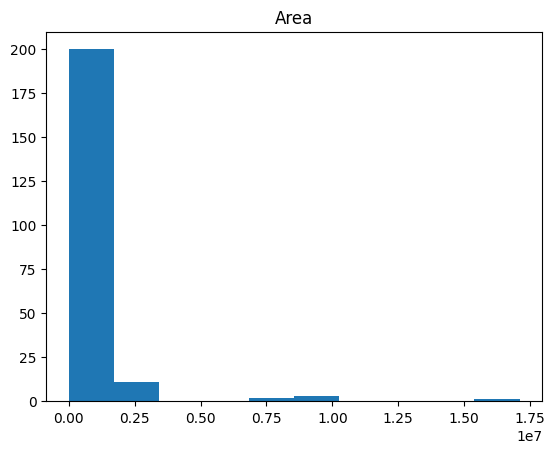

In [45]:
for column in df.columns:
    if df[column].dtype == float:
        plt.hist(df[column])
        plt.title(column)
        plt.show()

Створимо стовпчик із щільністю населення.

In [46]:
df["Population Density"] = df["Population"] / df["Area"]
df.head()

,Country Name,Region,GDP per capita,Population,CO2 emission,Area,Population Density
0,Afghanistan,South Asia,561.778746,34656032.0,9809.225000,652860.0,53.083405
1,Albania,Europe & Central Asia,4124.982390,2876101.0,5716.853000,28750.0,100.038296
2,Algeria,Middle East & North Africa,3916.881571,40606052.0,145400.217000,2381740.0,17.048902
3,American Samoa,East Asia & Pacific,11834.745230,55599.0,165114.116337,200.0,277.995000
4,Andorra,Europe & Central Asia,36988.622030,77281.0,462.042000,470.0,164.427660


Пропущені значення уже були замінені на середні.
Тепер знайдемо країну з найбільшим ВВП на людину та країну з найменшою площею.

In [47]:
row_with_max_gdp = df.loc[df['GDP per capita'].idxmax()]
max_gdp_country = row_with_max_gdp['Country Name']
print("Країна з найбiльшим ВВП на людину:", max_gdp_country)

row_with_min_area = df.loc[df['Area'].idxmin()]
min_area_country_name = row_with_min_area['Country Name']
print("Країна з найменшою площею:", min_area_country_name)

Країна з найбiльшим ВВП на людину: Luxembourg
Країна з найменшою площею: Monaco


Знайдемо регіон, в якому середня площа країни найбільша.

In [48]:
avg_areas_in_region = df.groupby(['Region']).mean(numeric_only=True)['Area']
region_with_max_avg_areas = avg_areas_in_region.idxmax()
print("Регiон, в якому середня площа країни найбiльша:", region_with_max_avg_areas)

Регiон, в якому середня площа країни найбiльша: North America


Знайдемо країну з найбільшою щільністю населення у світі, у Європі та центральній Азії.


In [49]:
max_population_density_index_world = df['Population Density'].idxmax()
max_population_density_country_world = df.loc[max_population_density_index_world, 'Country Name']
print("Країна з найбiльшою щiльнiстю населення у свiтi:", max_population_density_country_world)

df_eu_and_ca_countries = df[df['Region'] == 'Europe & Central Asia']
max_population_density_eu_ca_index = df_eu_and_ca_countries['Population Density'].idxmax()
max_population_density_eu_ca_country = df.loc[max_population_density_eu_ca_index, 'Country Name']
print("Країна з найбiльшою щiльнiстю населення у Європi та центральнiй Азiї:", max_population_density_eu_ca_country)


Країна з найбiльшою щiльнiстю населення у свiтi: Macao SAR, China
Країна з найбiльшою щiльнiстю населення у Європi та центральнiй Азiї: Monaco


Перевіримо, чи співпадає в якомусь регіоні середнє та медіана ВВП.

In [50]:
mean_gdp_region = df.groupby(['Region']).mean(numeric_only=True)['GDP per capita']
median_gdp_region = df.groupby(['Region']).median(numeric_only=True)['GDP per capita']

print('Середнє ВВП за регіоном:\n', mean_gdp_region)
print('Медіана за регіоном:\n', median_gdp_region)

Середнє ВВП за регіоном:
 Region
East Asia & Pacific           15130.226548
Europe & Central Asia         22742.135518
Latin America & Caribbean     10485.343136
Middle East & North Africa    15459.162533
North America                 37755.682535
South Asia                     2795.213935
Sub-Saharan Africa             2878.665521
Name: GDP per capita, dtype: float64
Медіана за регіоном:
 Region
East Asia & Pacific            5910.620932
Europe & Central Asia         13445.593416
Latin America & Caribbean     10833.201075
Middle East & North Africa    13445.593416
North America                 42183.295100
South Asia                     1576.608412
Sub-Saharan Africa             1034.390361
Name: GDP per capita, dtype: float64


In [58]:
compare_mean_median = mean_gdp_region.compare(median_gdp_region, align_axis=1).rename(columns={'self': 'mean', 'other': 'median'}, level=-1)
compare_mean_median['diff'] = compare_mean_median['mean'] - compare_mean_median['median']
print(compare_mean_median)
print("\nРядки, в яких різниця між середнім та медіаною дорівнює нулю:")
print(compare_mean_median.loc[(compare_mean_median['diff'] == 0)])

                                    mean        median         diff
Region                                                             
East Asia & Pacific         15130.226548   5910.620932  9219.605616
Europe & Central Asia       22742.135518  13445.593416  9296.542102
Latin America & Caribbean   10485.343136  10833.201075  -347.857939
Middle East & North Africa  15459.162533  13445.593416  2013.569117
North America               37755.682535  42183.295100 -4427.612565
South Asia                   2795.213935   1576.608412  1218.605523
Sub-Saharan Africa           2878.665521   1034.390361  1844.275160

Рядки, в яких різниця між середнім та медіаною дорівнює нулю:
Empty DataFrame
Columns: [mean, median, diff]
Index: []


Тепер знайдемо регіони з найменшою різницею між mean та median.

In [86]:
print(compare_mean_median.iloc[(compare_mean_median['diff']).abs().argsort()].head(3))

                                   mean        median         diff
Region                                                            
Latin America & Caribbean  10485.343136  10833.201075  -347.857939
South Asia                  2795.213935   1576.608412  1218.605523
Sub-Saharan Africa          2878.665521   1034.390361  1844.275160


Виведемо топ 5 країн та 5 останніх країн по ВВП та кількості СО2 на душу населення.

In [87]:
sorted_df_by_gdp = df.sort_values(by='GDP per capita', ascending=False)
print('Топ-5 країн по ВВП на душу населення:')
print(sorted_df_by_gdp.head())

Топ-5 країн по ВВП на душу населення:
         Country Name                 Region  GDP per capita  Population  \
115        Luxembourg  Europe & Central Asia    100738.68420    582972.0   
188       Switzerland  Europe & Central Asia     79887.51824   8372098.0   
116  Macao SAR, China    East Asia & Pacific     74017.18471    612167.0   
146            Norway  Europe & Central Asia     70868.12250   5232929.0   
92            Ireland  Europe & Central Asia     64175.43824   4773095.0   

     CO2 emission      Area  Population Density  CO2 emission per capita  
115      9658.878    2590.0          225.085714                 0.016568  
188     35305.876   41290.0          202.763333                 0.004217  
116      1283.450      30.3        20203.531353                 0.002097  
146     47626.996  385178.0           13.585742                 0.009101  
92      34066.430   70280.0           67.915410                 0.007137  


In [88]:
print('Топ-5 країн з найменшим ВВП на душу населення:')
print(sorted_df_by_gdp.tail())

Топ-5 країн з найменшим ВВП на душу населення:
                 Country Name              Region  GDP per capita  Population  \
118                Madagascar  Sub-Saharan Africa      401.742270  24894551.0   
37   Central African Republic  Sub-Saharan Africa      382.213174   4594621.0   
134                Mozambique  Sub-Saharan Africa      382.069330  28829476.0   
119                    Malawi  Sub-Saharan Africa      300.307665  18091575.0   
31                    Burundi  Sub-Saharan Africa      285.727442  10524117.0   

     CO2 emission      Area  Population Density  CO2 emission per capita  
118      3076.613  587295.0           42.388495                 0.000124  
37        300.694  622980.0            7.375230                 0.000065  
134      8426.766  799380.0           36.064795                 0.000292  
119      1276.116  118480.0          152.697291                 0.000071  
31        440.040   27830.0          378.157276                 0.000042  


In [82]:
df['CO2 emission per capita'] = df['CO2 emission'] / df['Population']

sorted_df_by_CO2 = df.sort_values(['CO2 emission per capita'], ascending=False)
print('Топ-5 країн з найбільшою кількістю СО2 на душу населення:')
print(sorted_df_by_CO2.head())

Топ-5 країн з найбільшою кількістю СО2 на душу населення:
                 Country Name                     Region  GDP per capita  \
182  St. Martin (French part)  Latin America & Caribbean    13445.593416   
163                San Marino      Europe & Central Asia    47908.561410   
130                    Monaco      Europe & Central Asia    13445.593416   
145  Northern Mariana Islands        East Asia & Pacific    22572.378820   
3              American Samoa        East Asia & Pacific    11834.745230   

     Population   CO2 emission   Area  Population Density  \
182     31949.0  165114.116337   54.4          587.297794   
163     33203.0  165114.116337   60.0          553.383333   
130     38499.0  165114.116337    2.0        19249.500000   
145     55023.0  165114.116337  460.0          119.615217   
3       55599.0  165114.116337  200.0          277.995000   

     CO2 emission per capita  
182                 5.168053  
163                 4.972867  
130                 4.288

In [83]:
print('Топ-5 країн з найменшою кількістю СО2 на душу населення:')
print(sorted_df_by_CO2.tail())

Топ-5 країн з найменшою кількістю СО2 на душу населення:
         Country Name              Region  GDP per capita    Population  \
44   Congo, Dem. Rep.  Sub-Saharan Africa      405.542501  7.873615e+07   
38               Chad  Sub-Saharan Africa      664.295652  1.445254e+07   
175           Somalia  Sub-Saharan Africa      434.208810  1.431800e+07   
31            Burundi  Sub-Saharan Africa      285.727442  1.052412e+07   
61            Eritrea  Sub-Saharan Africa    13445.593416  3.432256e+07   

     CO2 emission       Area  Population Density  CO2 emission per capita  
44       4671.758  2344860.0           33.578189                 0.000059  
38        729.733  1284000.0           11.255875                 0.000050  
175       608.722   637660.0           22.453966                 0.000043  
31        440.040    27830.0          378.157276                 0.000042  
61        696.730   117600.0          291.858502                 0.000020  
